# Model with arrays as input

### Reliability calculations with arrays as arguments in the model

This example demonstrates how to perform reliability calculations with a limit state function that has multiple arguments, all following a similar distribution function.

### Define model

First, let's import the necessary classes:

In [1]:
from probabilistic_library import ReliabilityProject, DistributionType, ReliabilityMethod, Stochast

We consider the following limit state function:

$Z = 1.9 - [\sum_{i=1}^{n}(a_i)+\sum_{j=1}^{m}(b_j)]$

This is a linear model involving two arrays, $a$ and $b$.

In [2]:
from utils.models import linear_arrays

To perform a reliability analysis, we create a reliability project and specify the limit state function (model):

In [3]:
project = ReliabilityProject()
project.model = linear_arrays

project.model.print()

Model linear_arrays:
Input parameters:
  const_val
  a[1]
  b[1]
Output parameters:
  Z


In this example, we assume that array $a$ consists of $25$ variables following a uniform distribution over the interval $[-1, 1]$. Array $b$ consists of $30$ variables, each normally distributed with a mean of $0$ and a standard deviation of $1$. This can be defined as follows:

In [4]:
project.variables["const_val"].distribution = DistributionType.deterministic
project.variables["const_val"].is_array = False
project.variables["const_val"].mean = 1.9

project.variables["a"].distribution = DistributionType.uniform
project.variables["a"].is_array = True # states that a is an array
project.variables["a"].array_size = 25
project.variables["a"].minimum = -1
project.variables["a"].maximum = 1

project.variables["b"].distribution = DistributionType.normal
project.variables["b"].is_array = True # states that b is an array
project.variables["b"].array_size = 30
project.variables["b"].mean = 0
project.variables["b"].deviation = 1

### Perform reliability calculations

We perform the reliability calculations using the `form` method.

In [5]:
project.settings.reliability_method = ReliabilityMethod.form
project.settings.relaxation_factor = 0.15
project.settings.maximum_iterations = 50
project.settings.epsilon_beta = 0.01

project.run()

project.design_point.print()

Reliability (FORM)
 Reliability index = 0.2804
 Probability of failure = 0.3896
 Convergence = 0.00941 (converged)
 Model runs = 1904
Alpha values:
 const_val: alpha = 0, x = 1.9
 a[0]: alpha = 0.1176, x = -0.02631
 a[1]: alpha = 0.1176, x = -0.02631
 a[2]: alpha = 0.1176, x = -0.02631
 a[3]: alpha = 0.1176, x = -0.02631
 a[4]: alpha = 0.1176, x = -0.02631
 a[5]: alpha = 0.1176, x = -0.02631
 a[6]: alpha = 0.1176, x = -0.02631
 a[7]: alpha = 0.1176, x = -0.02631
 a[8]: alpha = 0.1176, x = -0.02631
 a[9]: alpha = 0.1176, x = -0.02631
 a[10]: alpha = 0.1176, x = -0.02631
 a[11]: alpha = 0.1176, x = -0.02631
 a[12]: alpha = 0.1176, x = -0.02631
 a[13]: alpha = 0.1176, x = -0.02631
 a[14]: alpha = 0.1176, x = -0.02631
 a[15]: alpha = 0.1176, x = -0.02631
 a[16]: alpha = 0.1176, x = -0.02631
 a[17]: alpha = 0.1176, x = -0.02631
 a[18]: alpha = 0.1176, x = -0.02631
 a[19]: alpha = 0.1176, x = -0.02631
 a[20]: alpha = 0.1176, x = -0.02631
 a[21]: alpha = 0.1176, x = -0.02631
 a[22]: alpha = 0

### Similar distributions

It can also occur that variables in the array follow a similar distribution, which can be defined, for example, using a formula. This is demonstrated for the array 
$a$:

Reliability (FORM)
 Reliability index = 2.101
 Probability of failure = 0.01784
 Convergence = 0.009844 (converged)
 Model runs = 1904
Alpha values:
 const_val: alpha = 0, x = 1.9
 a[0]: alpha = 0.07809, x = 0.836
 a[1]: alpha = 0.0859, x = 0.8015
 a[2]: alpha = 0.0937, x = 0.7638
 a[3]: alpha = 0.1015, x = 0.7228
 a[4]: alpha = 0.1093, x = 0.6785
 a[5]: alpha = 0.1171, x = 0.6309
 a[6]: alpha = 0.1249, x = 0.5801
 a[7]: alpha = 0.1327, x = 0.526
 a[8]: alpha = 0.1406, x = 0.4686
 a[9]: alpha = 0.1484, x = 0.4079
 a[10]: alpha = 0.1562, x = 0.3439
 a[11]: alpha = 0.164, x = 0.2767
 a[12]: alpha = 0.1718, x = 0.2061
 a[13]: alpha = 0.1796, x = 0.1323
 a[14]: alpha = 0.1874, x = 0.05522
 a[15]: alpha = 0.1952, x = -0.02515
 a[16]: alpha = 0.203, x = -0.1088
 a[17]: alpha = 0.2108, x = -0.1957
 a[18]: alpha = 0.2186, x = -0.286
 a[19]: alpha = 0.2265, x = -0.3794
 a[20]: alpha = 0.2343, x = -0.4762
 a[21]: alpha = 0.2421, x = -0.5763
 a[22]: alpha = 0.2499, x = -0.6796
 a[23]: alpha = 0.2

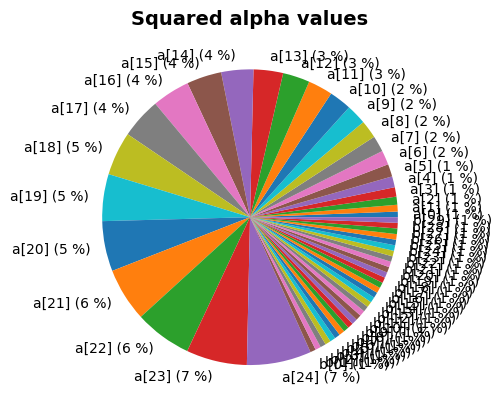

In [ ]:
for i in range(project.variables["a"].array_size):
    a_array = Stochast()
    a_array.distribution = DistributionType.normal
    a_array.location = 1.0
    a_array.scale = 1.0+0.1*i
    project.variables["a"].array_variables.append(a_array)

project.run()

project.design_point.print()
project.design_point.plot_alphas()
